- Sobhan Moradian Daghigh
- 6/2/2022
- DIP - HW03 - Q3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob

In [16]:
def load_datas(folder_name):
    images = []
    names = []
    files = glob.glob('{}*.png'.format(folder_name))
    for file in files:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        name = file.split('\\')[-1][:-4]
        print('   |_ Image  {:<11s} loaded.'.format(name))
        
        images.append(img)
        names.append(name)               
    return images, names

In [27]:
images, names = load_datas('./inputs/P3/')

   |_ Image  painting_1  loaded.
   |_ Image  painting_2  loaded.
   |_ Image  painting_3  loaded.
   |_ Image  painting_4  loaded.
   |_ Image  painting_5  loaded.
   |_ Image  painting_6  loaded.
   |_ Image  painting_7  loaded.
   |_ Image  painting_8  loaded.


In [18]:
def plotter(images, names=None, subplots=None, gray=False):
    if subplots is None:
        plt.imshow(images, cmap='gray') if gray else plt.imshow(images)
        plt.title(names)
        plt.axis('off')
    else:
        fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(subplots[1] * 5, subplots[0] * 5))
        for i, (img, name, ax) in enumerate(zip(images, names, fig.axes)):
            ax.imshow(img, cmap='gray') if gray else ax.imshow(img)
            ax.set_title(name)
            ax.axis('off')
    plt.show()

In [24]:
def fourier_transform(img):
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = 20 * np.log(np.abs(fft_shift))
    phase = np.angle(fft_shift)
    return magnitude_spectrum, phase

   |_ image: painting_1


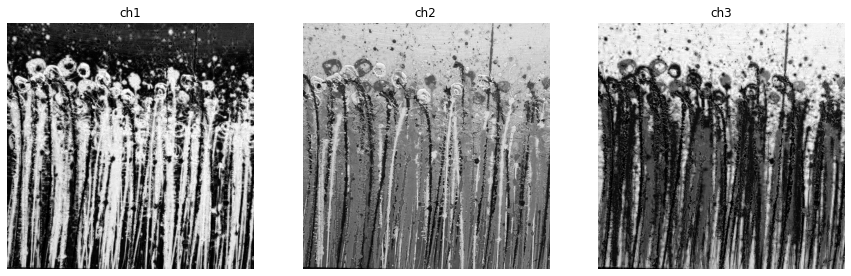

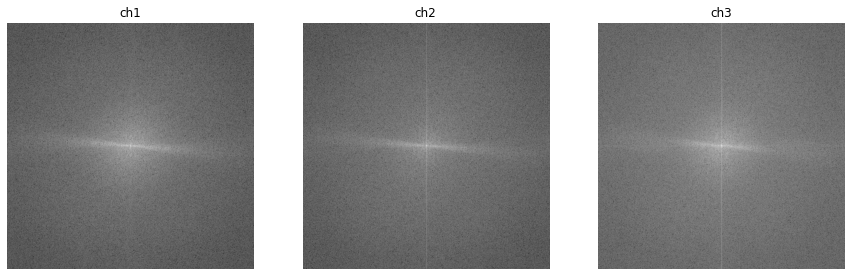

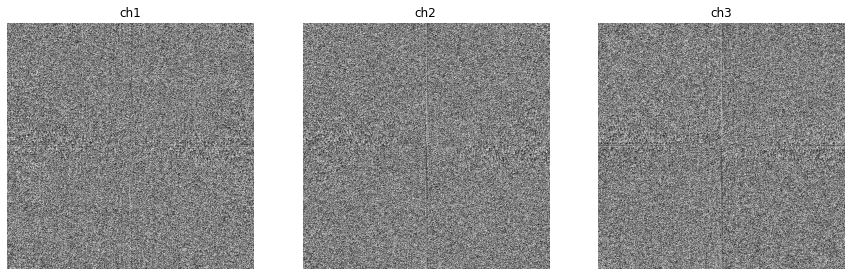

   |_ image: painting_2


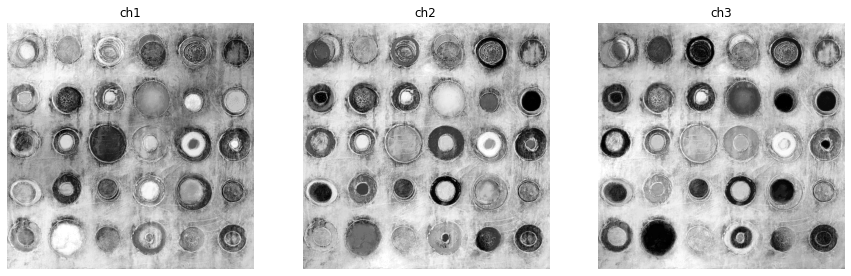

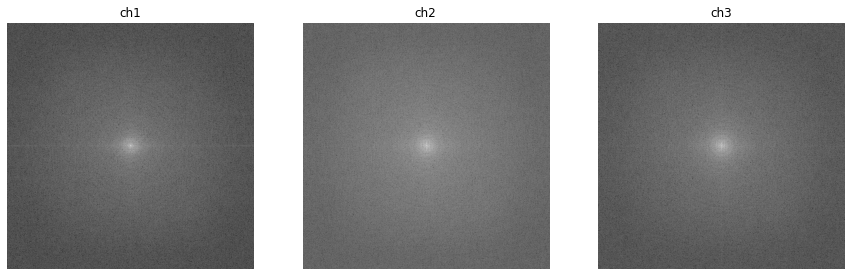

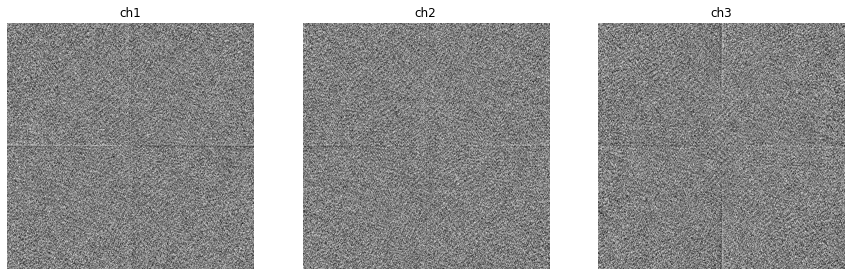

   |_ image: painting_3


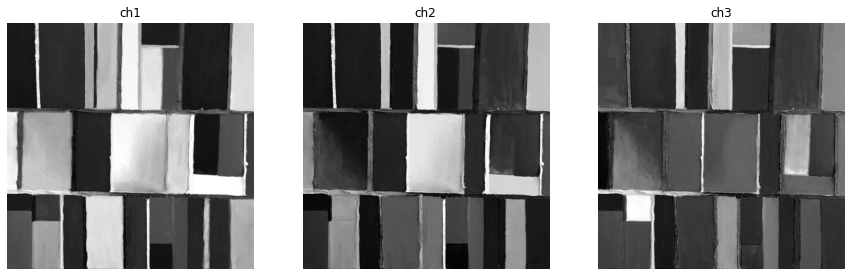

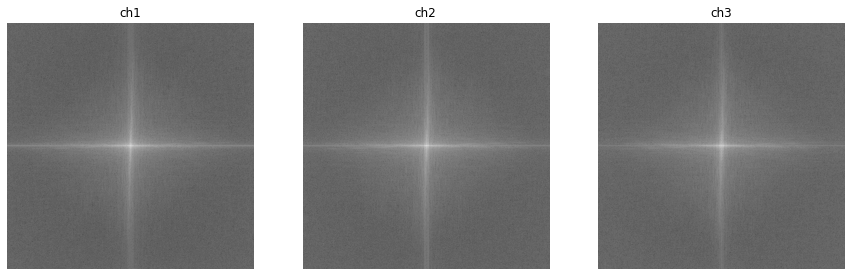

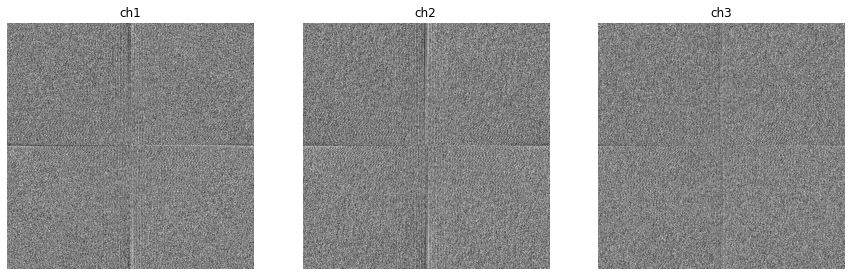

   |_ image: painting_4


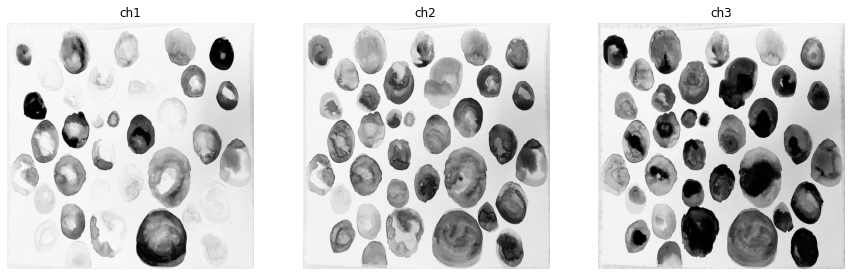

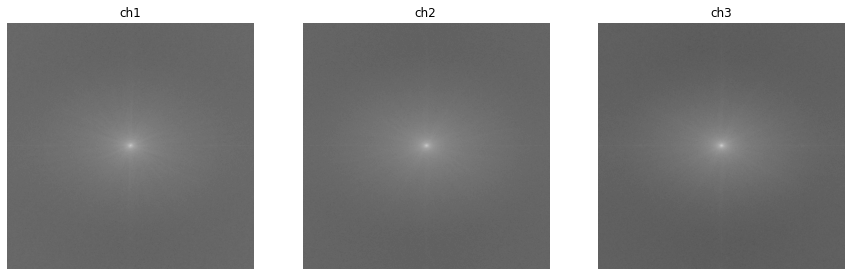

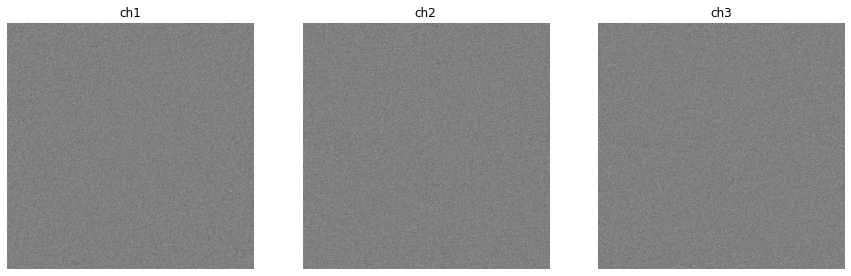

   |_ image: painting_5


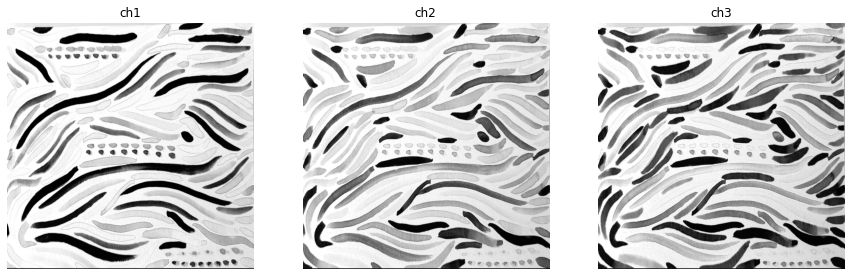

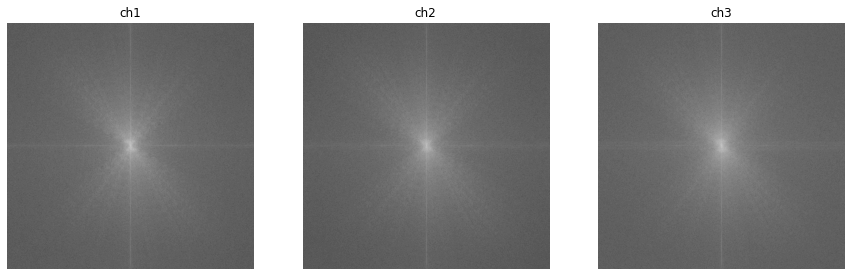

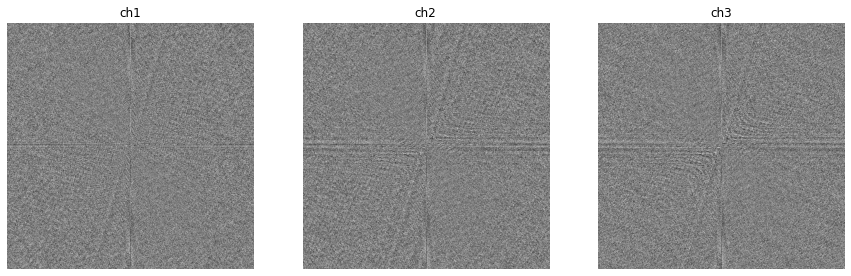

   |_ image: painting_6


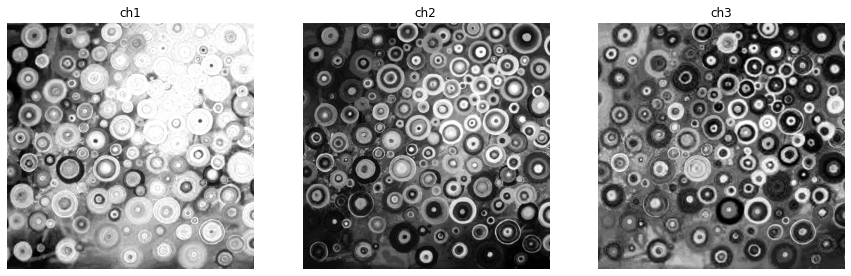

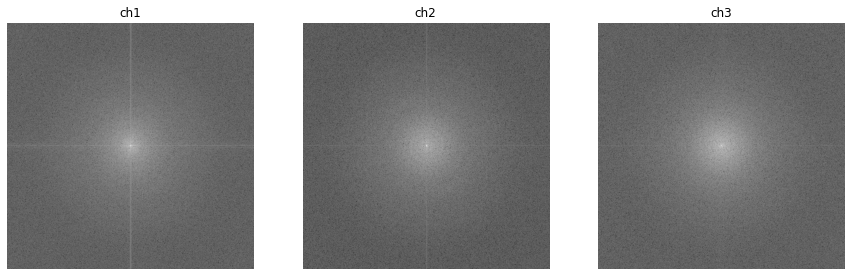

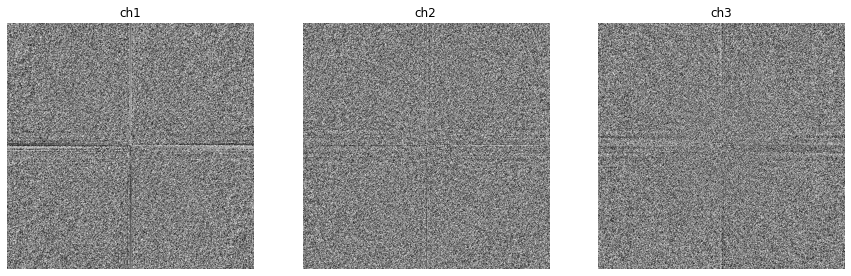

   |_ image: painting_7


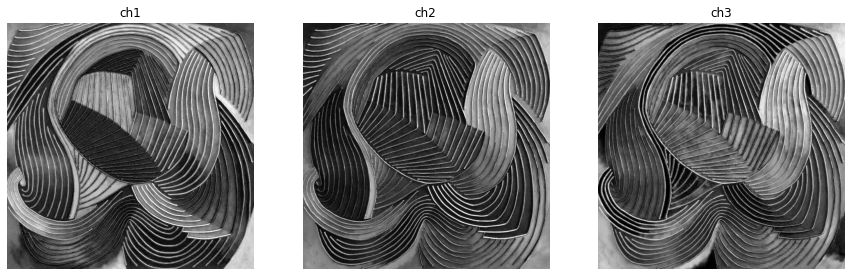

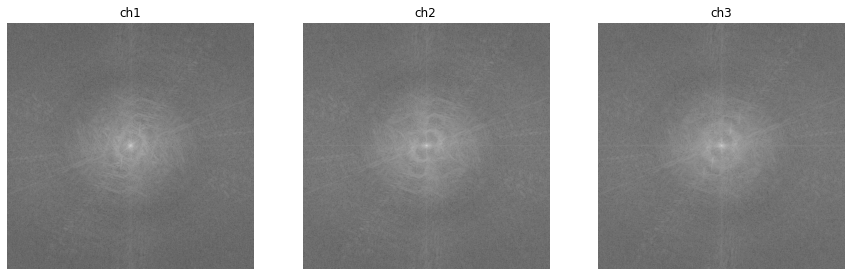

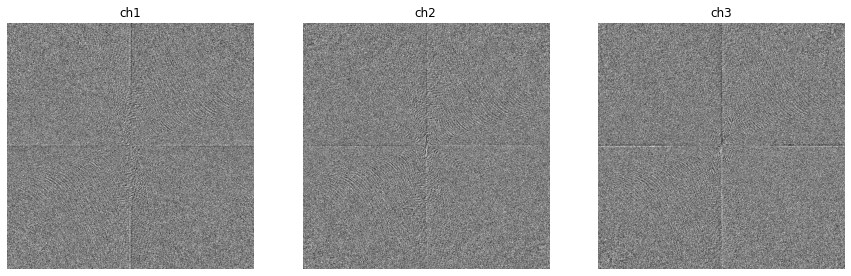

   |_ image: painting_8


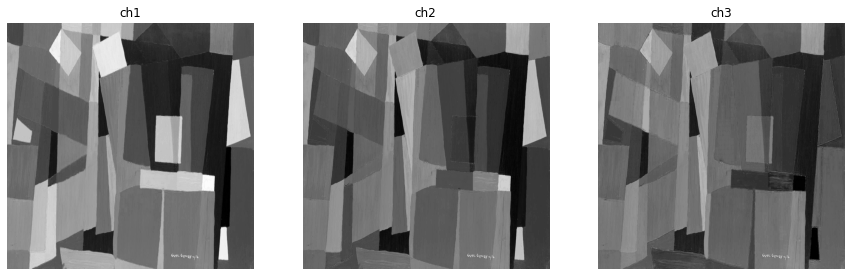

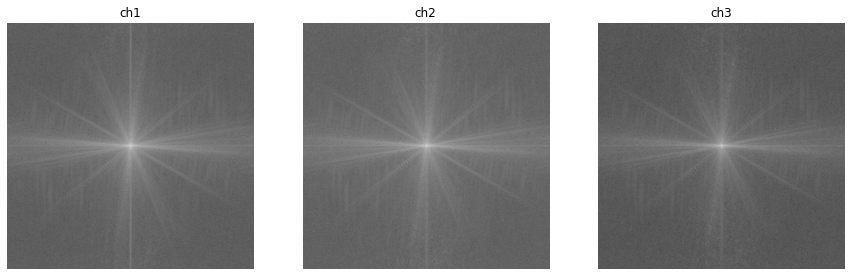

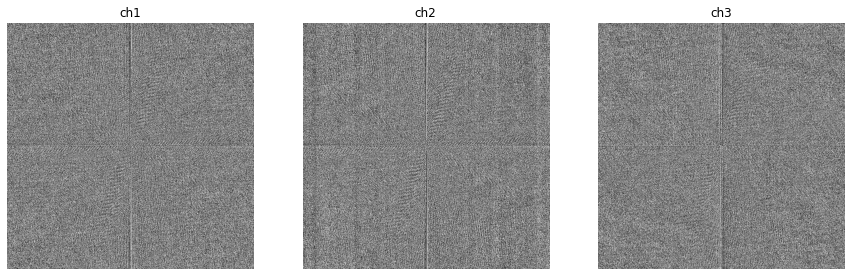

In [25]:
for i, (img, name) in enumerate(zip(images, names)):
    print('   |_ image: {}'.format(names[i]))
    channels = [img[:, :, 0], img[:, :, 1], img[:, :, 2]]
    plotter(channels, ['ch1', 'ch2', 'ch3'], subplots=(1, 3), gray=True)
    magnitudes = []
    phases = []
    for channel in channels:
        magnitude_spectrum, phase = fourier_transform(channel)
        magnitudes.append(magnitude_spectrum)
        phases.append(phase)
    plotter(magnitudes, ['ch1', 'ch2', 'ch3'], subplots=(1, 3), gray=True)   
    plotter(phases, ['ch1', 'ch2', 'ch3'], subplots=(1, 3), gray=True)   
    